### 1. Importing all the essential libraries

In [1]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import re
import seaborn as sns
import string
from sklearn import feature_extraction
from sklearn import metrics
from sklearn import pipeline
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

### 2. Loading the data

In [2]:
# Loading indonesian raw data

indonesian_df = pd.read_csv("datasets/indonesian.csv", header=None, names=['indonesian'])
indonesian_df.head()

,indonesian
0,(air) susu dibalas dng (air) tuba
1,(bagai) duri dalam daging
2,(me)rentan hati
3,(persetujuan) masih di perawanan
4,(sbg durian) pangsa menunjukkan bangsa (sbg du...


In [3]:
# Loading raw javanese data

javanese_df = pd.read_csv("datasets/javanese.csv", header=None, names=['javanese'])
javanese_df.head()

,javanese
0,(banyu) susu dijawab (banyu) tuba
1,(kaya) eri ing daging
2,(kula) rawan karo ati
3,(Persetujuan) isih ana kerentanan
4,(minangka Durian) Berbagi nuduhake bangsa (min...


In [4]:
# Loading raw sundanese data

sundanese_df = pd.read_csv("datasets/sundanese.csv", header=None, names=['sundanese'])
sundanese_df.head()

,sundanese
0,(cai) susu ngawaler (cai) Tuba
1,(sapertos) cucuk dina daging
2,(kuring) rentan ka jantung
3,(Persetujuan) masih aya dina kerentanan
4,(sakumaha Durian) Bagikeun nunjukkeun bangsa (...


In [5]:
# Loading raw toba_batak data

bataknese_df = pd.read_csv("datasets/toba_batak.csv", header=None, names=['bataknese'])
bataknese_df.head()

,bataknese
0,abu
1,orbuk
2,sirabun
3,sorbuk
4,adopsi


### 3. Data Preprocessing

In [6]:
for char in string.punctuation:
    print(char, end = ' ')
translate_table = dict((ord(char), None) for char in string.punctuation)

! " # $ % & ' ( ) * + , - . / : ; < = > ? @ [ \ ] ^ _ ` { | } ~ 

In [7]:
# Cleaning the data for indonesian dataset

data_indo = []
lang_indo = []

for i, row in indonesian_df.iterrows():
    line = row['indonesian']

    # Check if the value in the "indonesian" column is a string
    if isinstance(line, str):
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_indo.append(line)
        lang_indo.append("indonesian")

In [8]:
# Cleaning the data for javanese dataset

data_jawa = []
lang_jawa = []

for i, row in javanese_df.iterrows():
    line = row['javanese']

    # Check if the value in the "javanese" column is a string
    if isinstance(line, str):
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_jawa.append(line)
        lang_jawa.append("javanese")

In [9]:
# Cleaning the data for sundanese dataset

data_sunda = []
lang_sunda = []

for i, row in sundanese_df.iterrows():
    line = row['sundanese']

    # Check if the value in the "sundanese" column is a string
    if isinstance(line, str):
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_sunda.append(line)
        lang_sunda.append("sundanese")

In [10]:
# Cleaning the data for bataknese dataset

data_batak = []
lang_batak = []

for i, row in bataknese_df.iterrows():
    line = row['bataknese']

    # Check if the value in the "bataknese" column is a string
    if isinstance(line, str):
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_batak.append(line)
        lang_batak.append("bataknese")

### 4. Transforming the data into a single dataset

In [11]:
df = pd.DataFrame({
    "Text" : data_indo+data_jawa+data_sunda+data_batak,
    "Language" : lang_indo+lang_jawa+lang_sunda+lang_batak
})

print(df.shape)

(318403, 2)


In [12]:
df.head()

,Text,Language
0,air susu dibalas dng air tuba,indonesian
1,bagai duri dalam daging,indonesian
2,merentan hati,indonesian
3,persetujuan masih di perawanan,indonesian
4,sbg durian pangsa menunjukkan bangsa sbg duria...,indonesian


In [13]:
df.tail()

,Text,Language
318398,nunga tarbarita sahat ro didia,bataknese
318399,asa tangkas hita maduma,bataknese
318400,mardangka dao tu siamun,bataknese
318401,gok ma pinahan di toru tubu ma anak na malo ma...,bataknese
318402,riris ma jolma di ginjang,bataknese


In [14]:
df['Language'].value_counts()

sundanese     105374
javanese      105225
indonesian    105224
bataknese       2580
Name: Language, dtype: int64

<Axes: xlabel='Language', ylabel='count'>

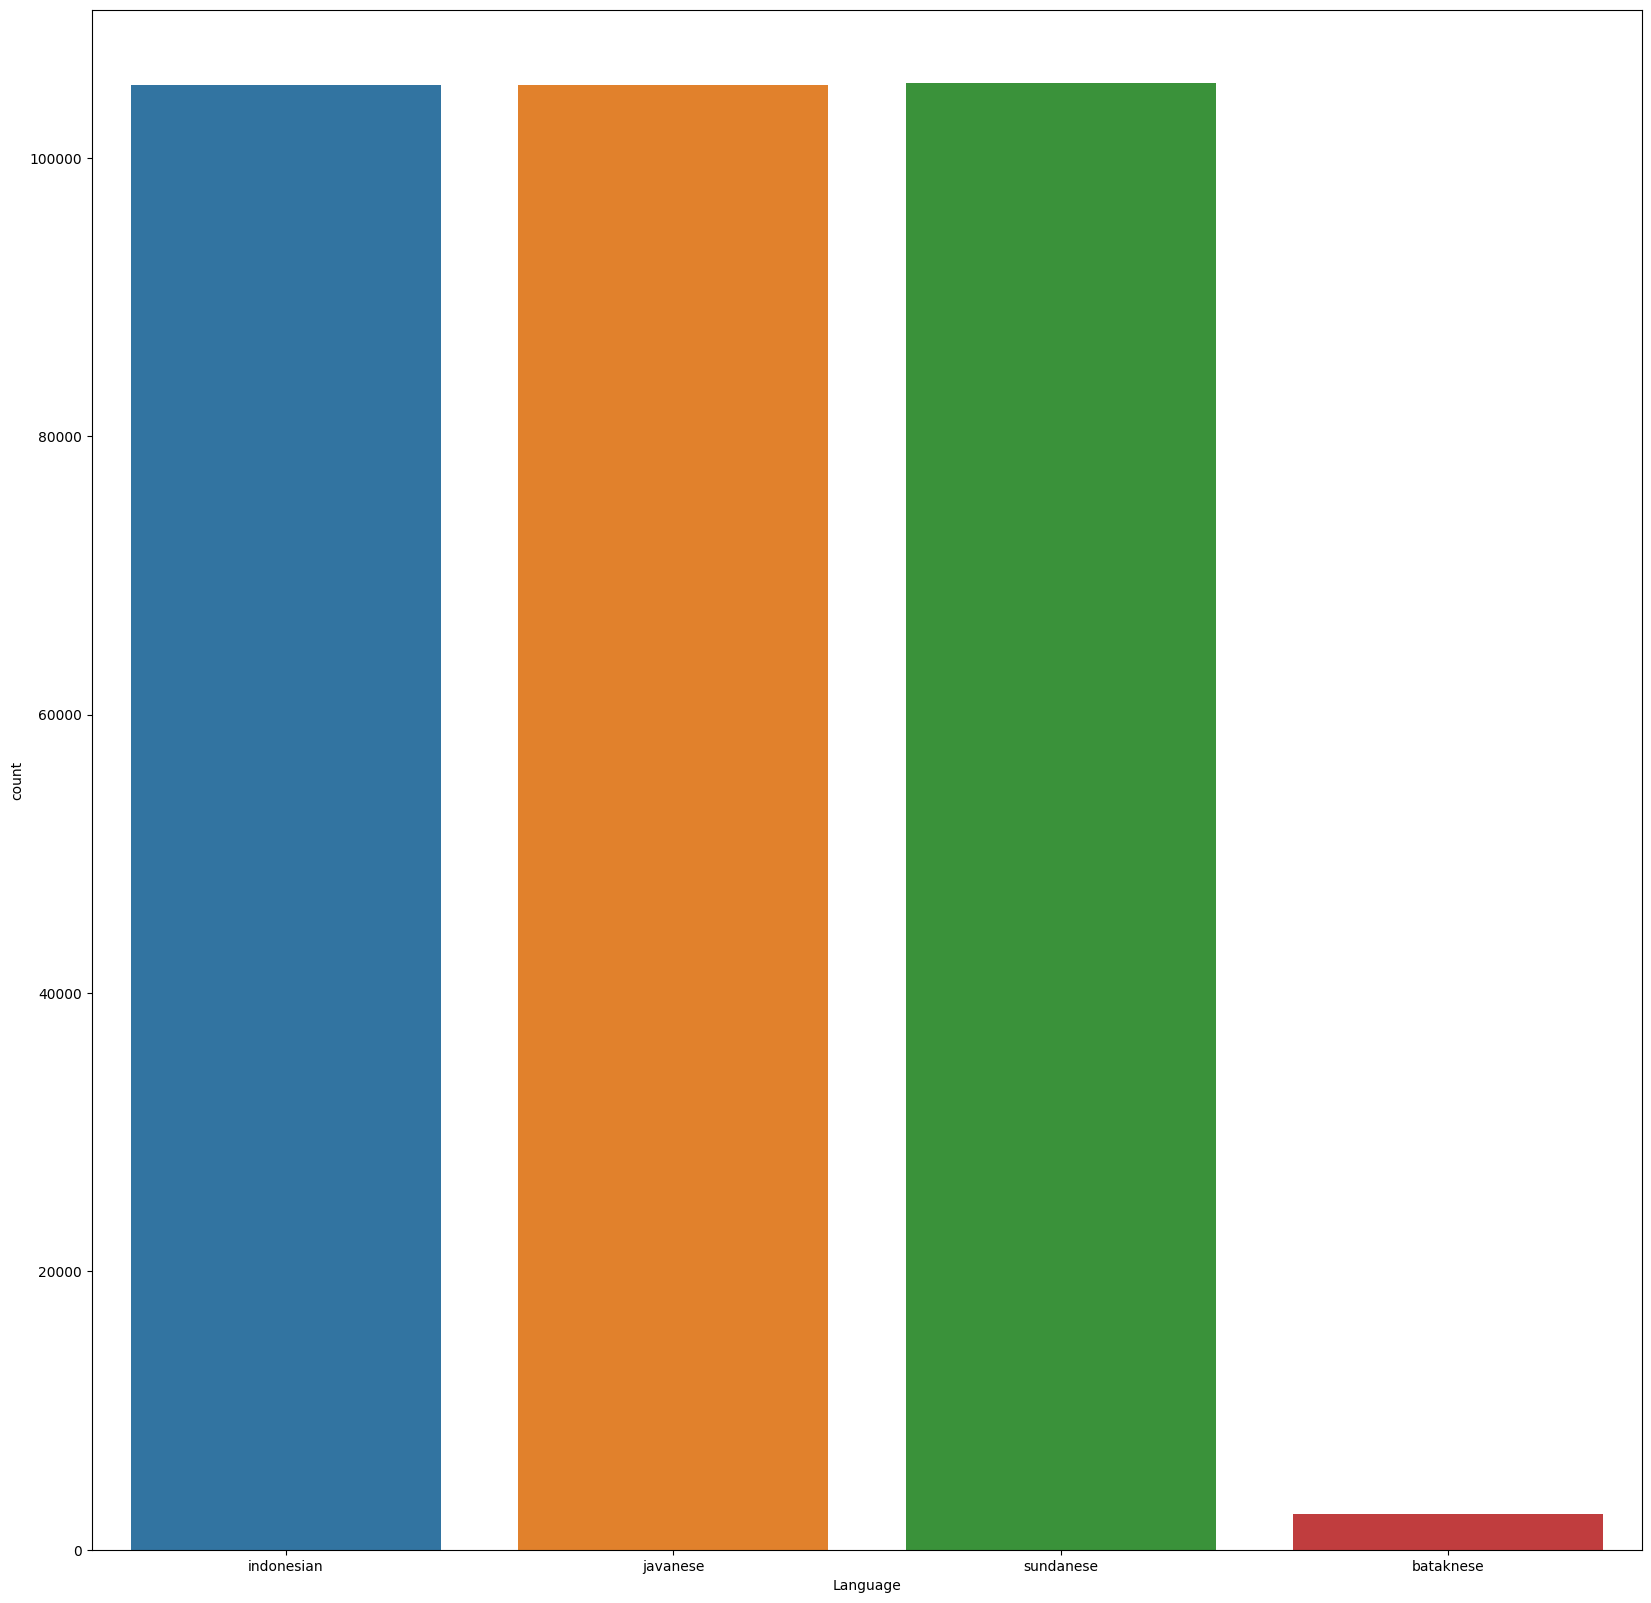

In [15]:
plt.figure(figsize=(20,20))
sns.countplot(x = df['Language'], data=df)

### 5. Splitting the dataset

* Splitting the dataset into Independent and Dependent variables

In [16]:
x = df.iloc[:,0] # Independent Variable
y = df.iloc[:,1] # Dependent Variable

In [17]:
y.head()

0    indonesian
1    indonesian
2    indonesian
3    indonesian
4    indonesian
Name: Language, dtype: object

In [18]:
x.head()

0                        air susu dibalas dng air tuba
1                              bagai duri dalam daging
2                                        merentan hati
3                       persetujuan masih di perawanan
4    sbg durian pangsa menunjukkan bangsa sbg duria...
Name: Text, dtype: object

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

## Applying TF-IDF Vectorizer

* `ngram_range` : It collets one , one two, one two three words 
* `analyzer` : We are not going word by word here we are going character by character that why we have used **char**.

In [20]:
vectorizer = feature_extraction.text.TfidfVectorizer(ngram_range=(1,3), analyzer='char')

## Model Prediction for MultinomialNB

In [21]:
pipe_mnb = pipeline.Pipeline([
    ('vectorizer', vectorizer),
    ('clf', MultinomialNB())
])

In [22]:
pipe_mnb.fit(x_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char', ngram_range=(1, 3))),
                ('clf', MultinomialNB())])

In [23]:
mnbfile = open('model/mnbmodel.pckl', 'wb')
pickle.dump(pipe_mnb, mnbfile)
mnbfile.close()

In [24]:
mnb_predicted = pipe_mnb.predict(x_test)

In [25]:
mnb_acc = (metrics.accuracy_score(y_test, mnb_predicted))*100
print('The MultinomialNB has :',mnb_acc,'% accuracy')

The MultinomialNB has : 53.30869651699627 % accuracy


## Model Prediction for Logistic Regression

In [26]:
pipe_lr = pipeline.Pipeline([
    ('vectorizer', vectorizer),
    ('lr_clf', LogisticRegression(max_iter=1000)) # Increase max_iter to 1000
])

In [27]:
pipe_lr.fit(x_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char', ngram_range=(1, 3))),
                ('lr_clf', LogisticRegression(max_iter=1000))])

In [28]:
lrfile = open('model/lrmodel.pckl', 'wb')
pickle.dump(pipe_lr, lrfile)
lrfile.close()

In [29]:
lr_predicted = pipe_lr.predict(x_test)

In [30]:
lr_acc = (metrics.accuracy_score(y_test, lr_predicted))*100
print('The logistic regression has:',lr_acc,'% accuracy')

The logistic regression has: 56.906858177782894 % accuracy


## Model Prediction for Decision Tree

In [31]:
pipe_dt = pipeline.Pipeline([
    ('vectorizer', vectorizer),
    ('dt_clf', DecisionTreeClassifier(max_depth=30, random_state=42))
])

In [32]:
pipe_dt.fit(x_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char', ngram_range=(1, 3))),
                ('dt_clf',
                 DecisionTreeClassifier(max_depth=30, random_state=42))])

In [33]:
dtfile = open('model/dtmodel.pckl', 'wb')
pickle.dump(pipe_dt, dtfile)
dtfile.close()

In [34]:
dt_predicted = pipe_dt.predict(x_test)

In [35]:
dt_acc = (metrics.accuracy_score(y_test, dt_predicted))*100
print('The decision tree has :',dt_acc,'% accuracy')

The decision tree has : 52.256571853309744 % accuracy


## Model Prediction for AdaBoost

In [36]:
pipe_ab = pipeline.Pipeline([
    ('vectorizer', vectorizer),
    ('dt_clf', AdaBoostClassifier(random_state=42))
])

In [37]:
pipe_ab.fit(x_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char', ngram_range=(1, 3))),
                ('dt_clf', AdaBoostClassifier(random_state=42))])

In [38]:
abfile = open('model/adamodel.pckl', 'wb')
pickle.dump(pipe_ab, abfile)
abfile.close()

In [39]:
ab_predicted = pipe_ab.predict(x_test)

In [40]:
ab_acc = (metrics.accuracy_score(y_test, ab_predicted))*100
print('The ada boost has :',ab_acc,'% accuracy')

The ada boost has : 46.915337988505144 % accuracy


## Model Prediction for Random Forest

In [41]:
pipe_rf = pipeline.Pipeline([
    ('vectorizer', vectorizer),
    ('dt_clf', RandomForestClassifier(
        max_depth=50, n_estimators=50, max_features=1, random_state=42)
        )
])

In [42]:
pipe_rf.fit(x_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char', ngram_range=(1, 3))),
                ('dt_clf',
                 RandomForestClassifier(max_depth=50, max_features=1,
                                        n_estimators=50, random_state=42))])

In [43]:
rffile = open('model/rfmodel.pckl', 'wb')
pickle.dump(pipe_rf, rffile)
rffile.close()

In [44]:
rf_predicted = pipe_rf.predict(x_test)

In [45]:
rf_acc = (metrics.accuracy_score(y_test, rf_predicted))*100
print('The random forest has :',rf_acc,'% accuracy')

The random forest has : 46.24114069157567 % accuracy


## Model Comparison

<Axes: xlabel='Model', ylabel='Accuracy'>

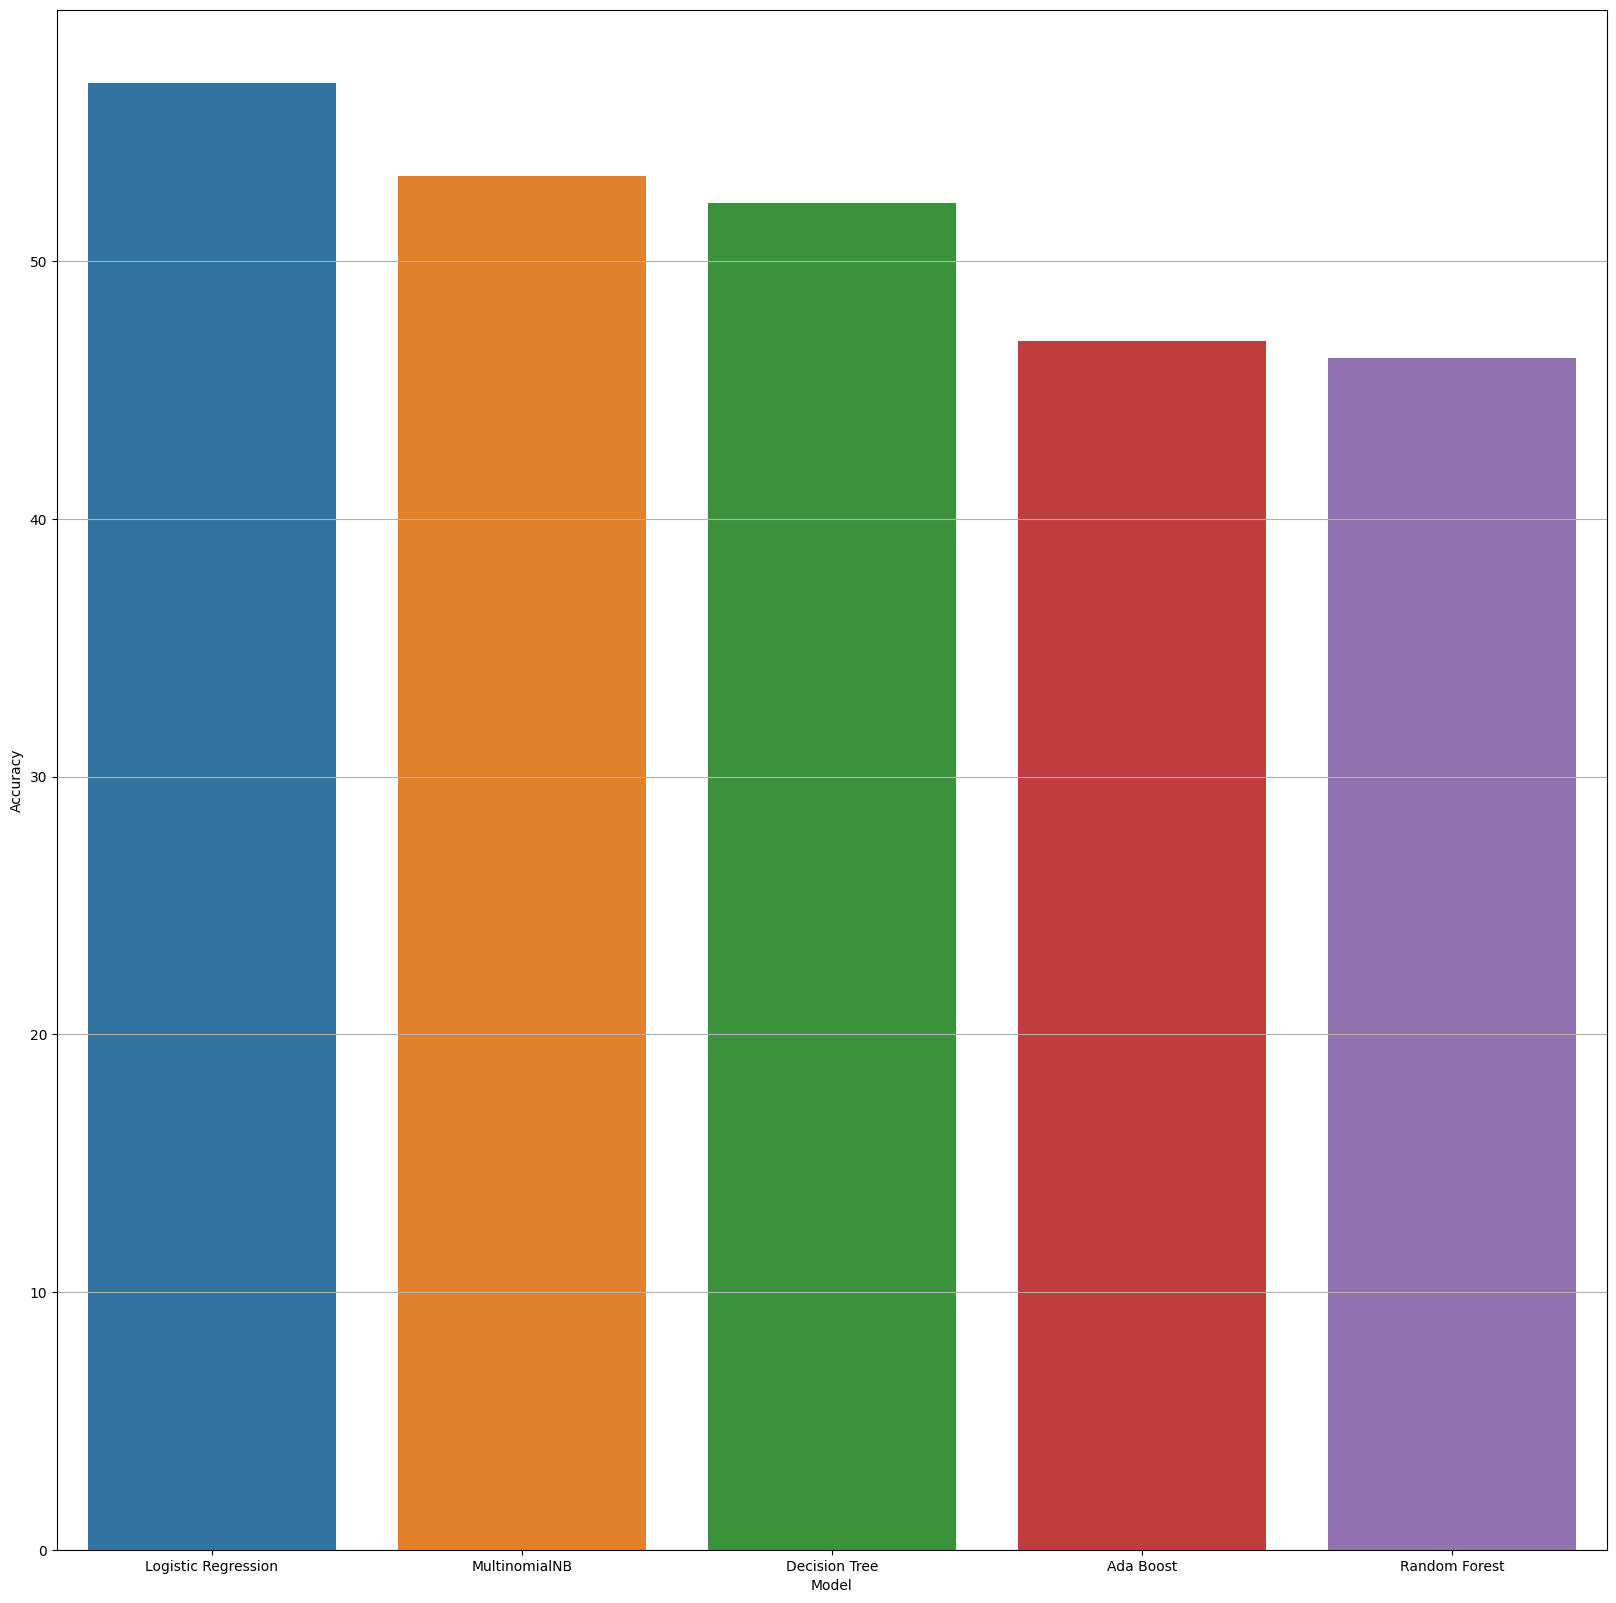

In [46]:
model_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'MultinomialNB', 'Decision Tree', 'Ada Boost', 'Random Forest'],
    'Accuracy': [lr_acc, mnb_acc, dt_acc, ab_acc, rf_acc]
})
plt.figure(figsize=(20,20))
plt.grid()
sns.barplot(x='Model', y='Accuracy', data=model_comparison)

## Evaluation matrix for Logistic Regression

In [47]:
matrix = metrics.confusion_matrix(y_test, lr_predicted)
print('Confusion matrix: \n', matrix)

Confusion matrix: 
 [[  142   189   127   274]
 [   11 20130  6196  5258]
 [    5  7916 16919  6775]
 [    5  6465  7942 17167]]


In [48]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Actual labels',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


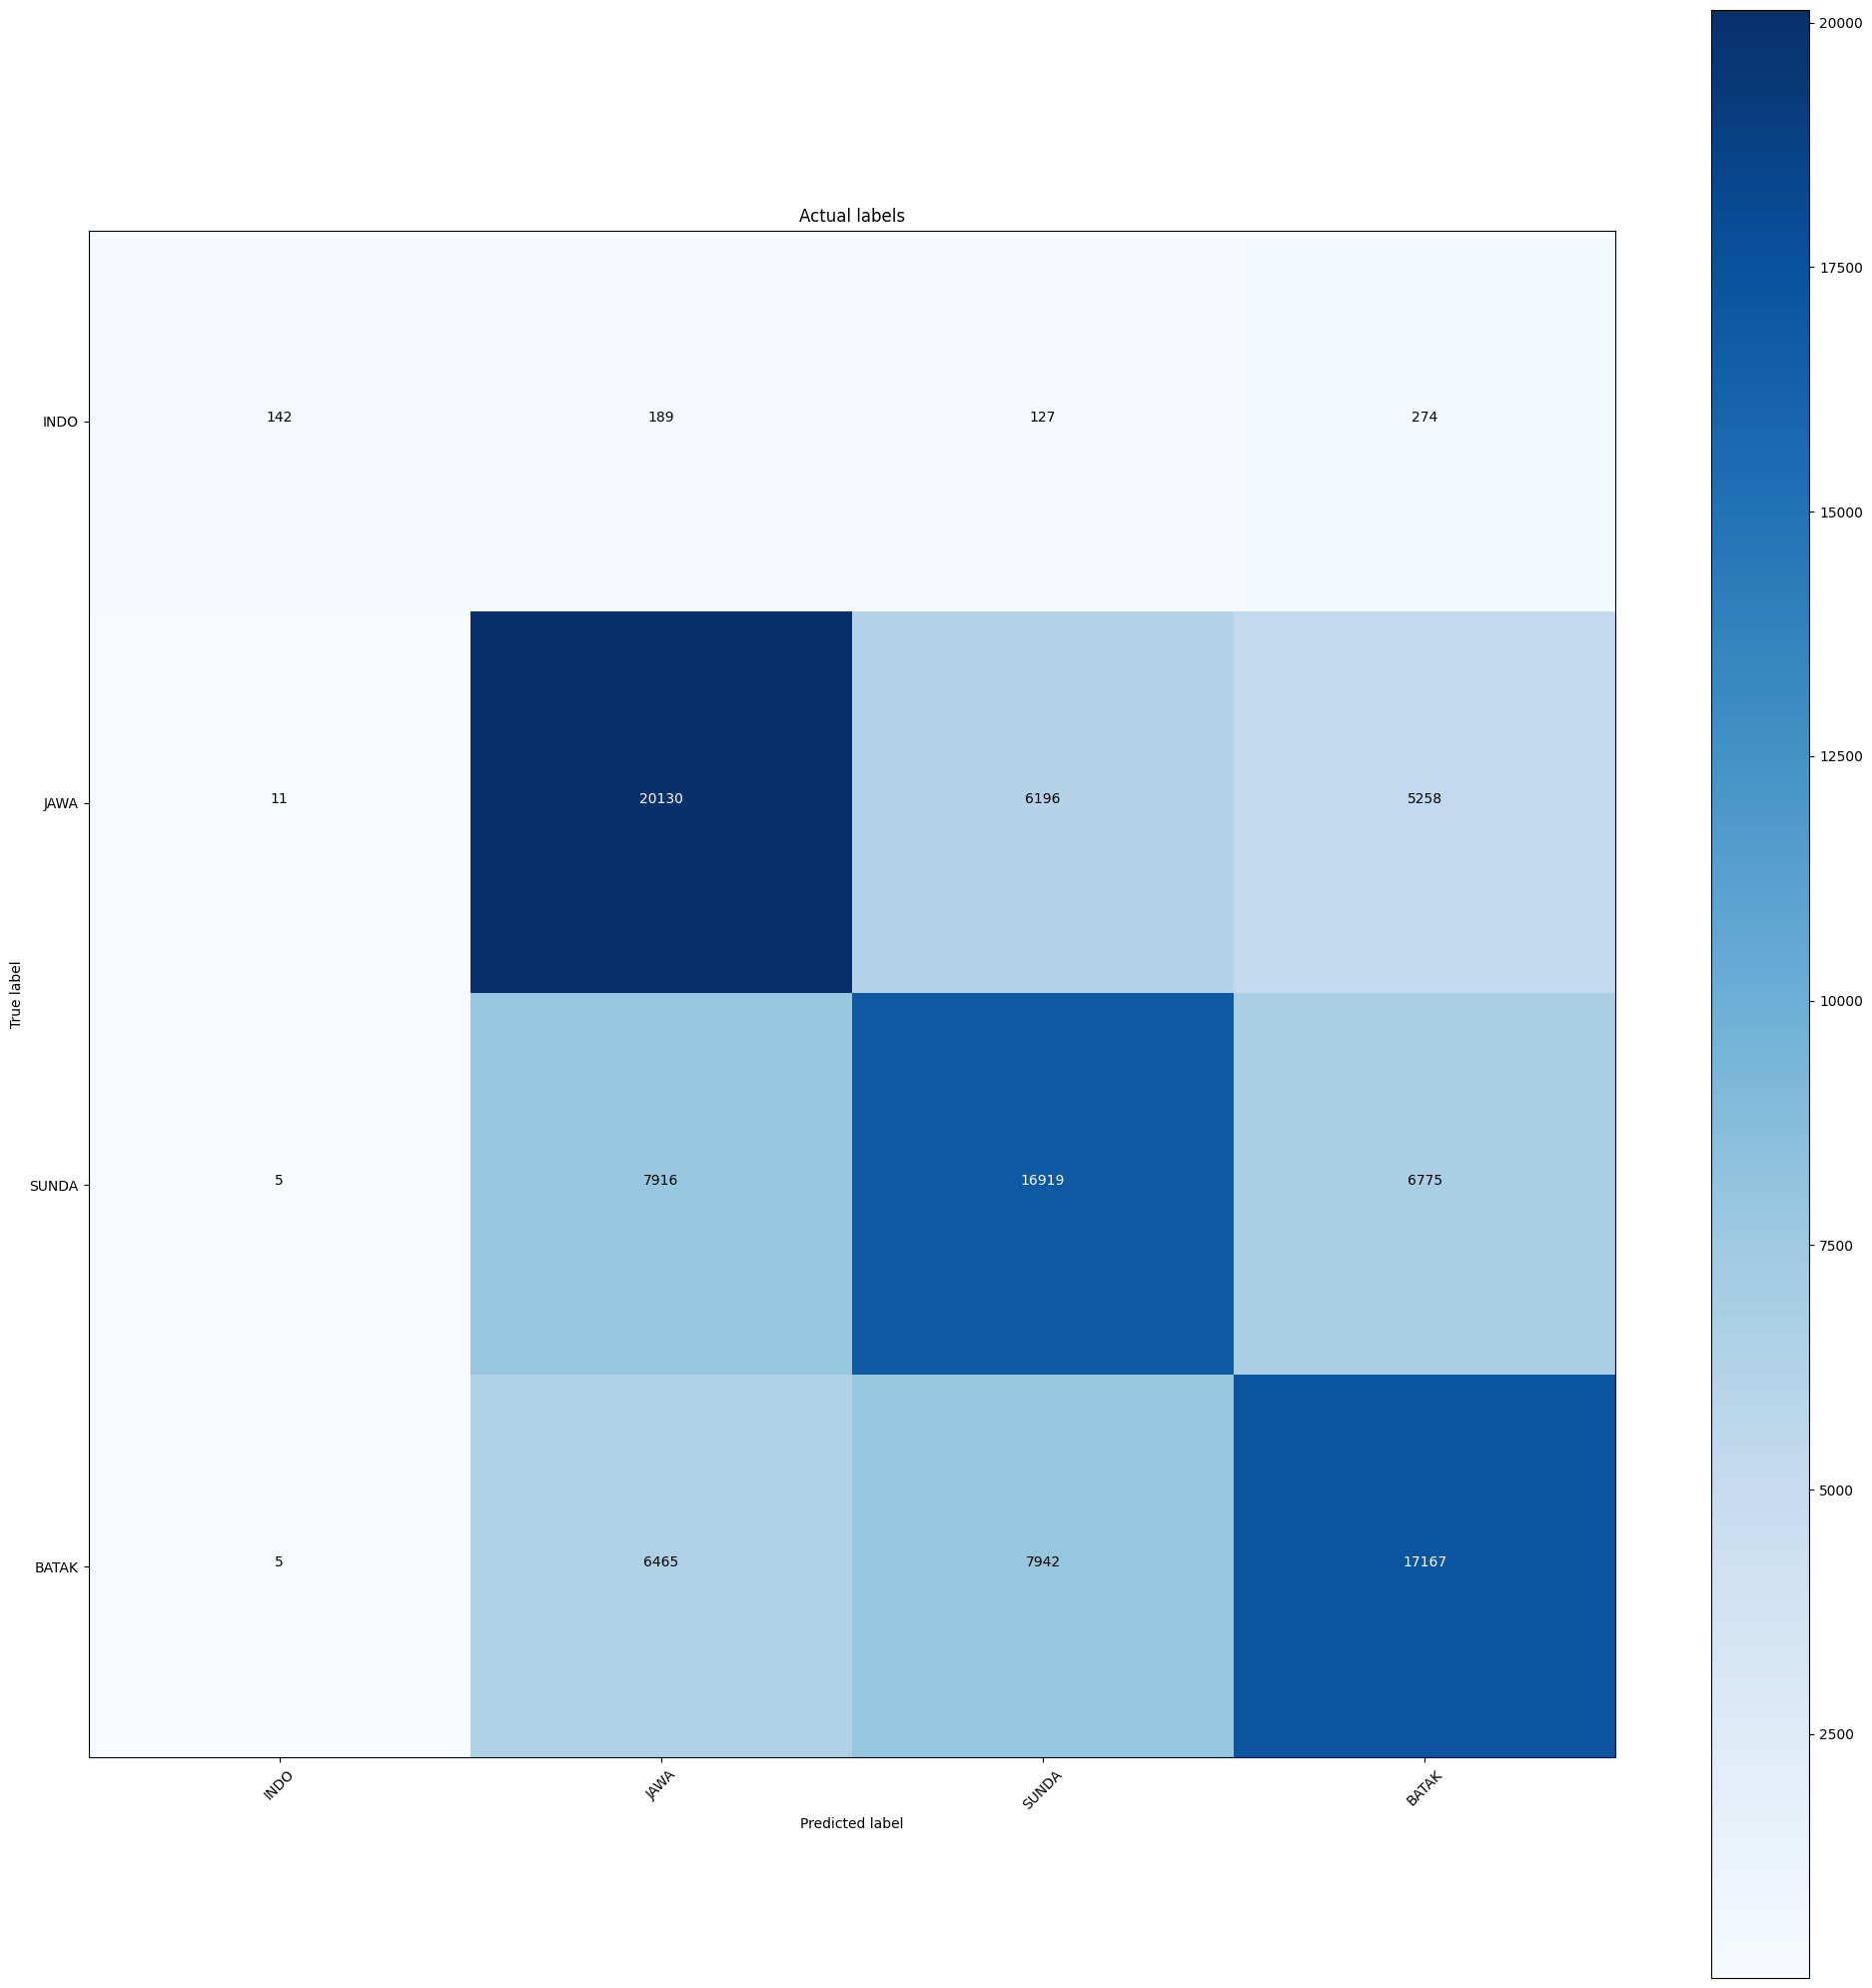

In [49]:
plt.figure(figsize=(20,20))
plot_confusion_matrix(matrix, classes = ['INDO', 'JAWA', 'SUNDA', 'BATAK'])